## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

%matplotlib inline

In [2]:
df = pd.read_csv('./breast-cancer.csv', header = None)

In [3]:
df.columns = [ 'id', 'clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity', 'marginal_adhesion', 'epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
print("Dataset shape: ",df.shape)
df

Dataset shape:  (699, 11)


,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.describe()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.dtypes

id                        int64
clump_thickness           int64
cell_size_uniformity      int64
cell_shape_uniformity     int64
marginal_adhesion         int64
epithelial_cell_size      int64
bare_nuclei              object
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object

## Data Preprocessing

### Finding and replacing the missing values

In [6]:
# Replace all '?' with NaN's 
df.replace('?', np.NaN, inplace = True)
df.isna().sum()

id                        0
clump_thickness           0
cell_size_uniformity      0
cell_shape_uniformity     0
marginal_adhesion         0
epithelial_cell_size      0
bare_nuclei              16
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

It can be seen that, all the (16) missing values are present in the 'bare_nuclei' column.

These missing values can be replaced with mode or median of that column.

In [7]:
print("Mode of 'bare_nuclei' column: ", df["bare_nuclei"].mode()[0])
print("Median of 'bare_nuclei' column: ", df["bare_nuclei"].median())
# print("Median of 'bare_nuclei' column: ", np.mean(df.bare_nuclei))

Mode of 'bare_nuclei' column:  1
Median of 'bare_nuclei' column:  1.0


In [8]:
# Replace all NaN's with the "Mode" of 'bare_nuclei' column 
df.bare_nuclei.replace(np.NaN, df["bare_nuclei"].mode()[0], inplace = True)
df.isna().sum()

id                       0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
epithelial_cell_size     0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
dtype: int64

In [9]:
df.bare_nuclei = df.bare_nuclei.astype(int)
df.dtypes

id                       int64
clump_thickness          int64
cell_size_uniformity     int64
cell_shape_uniformity    int64
marginal_adhesion        int64
epithelial_cell_size     int64
bare_nuclei              int64
bland_chromatin          int64
normal_nucleoli          int64
mitoses                  int64
class                    int64
dtype: object

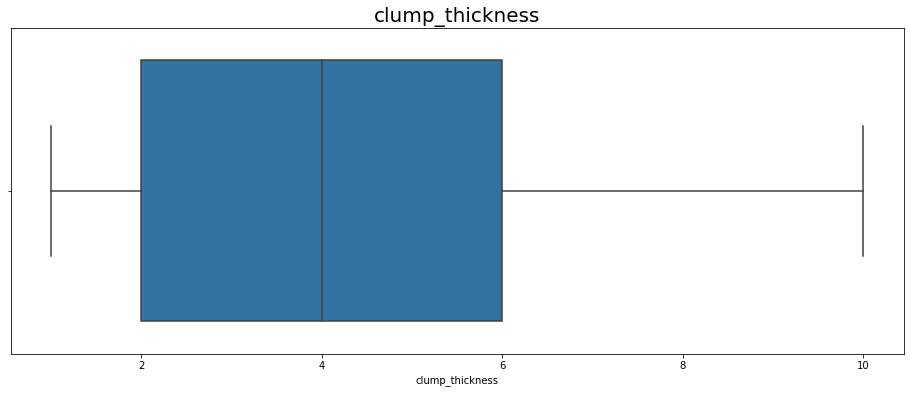

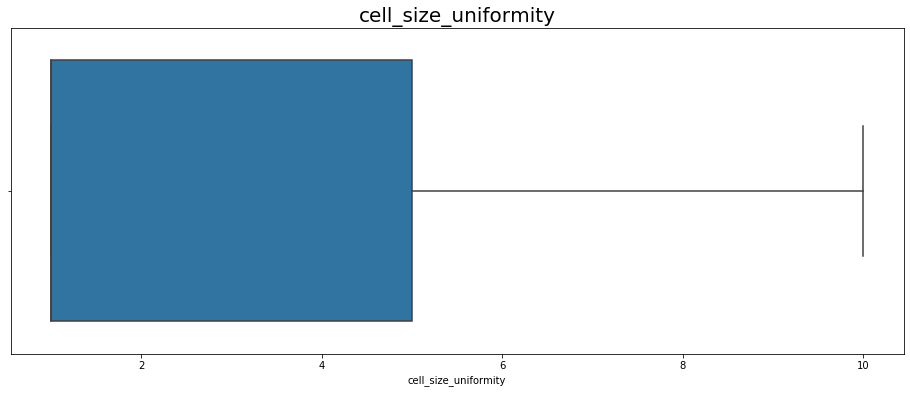

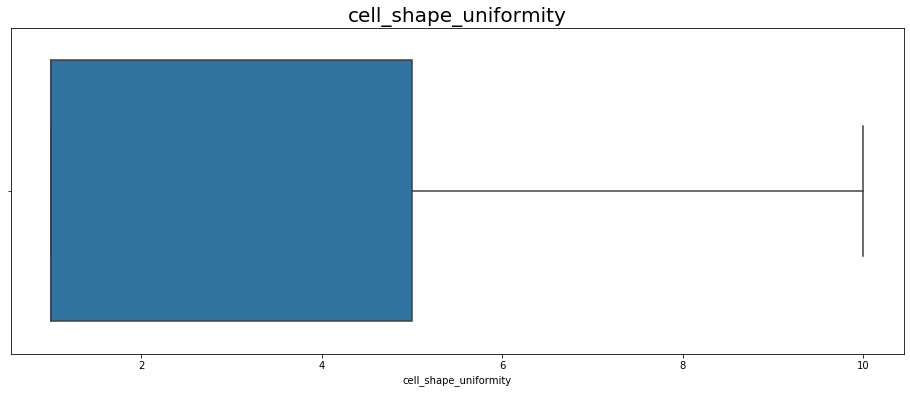

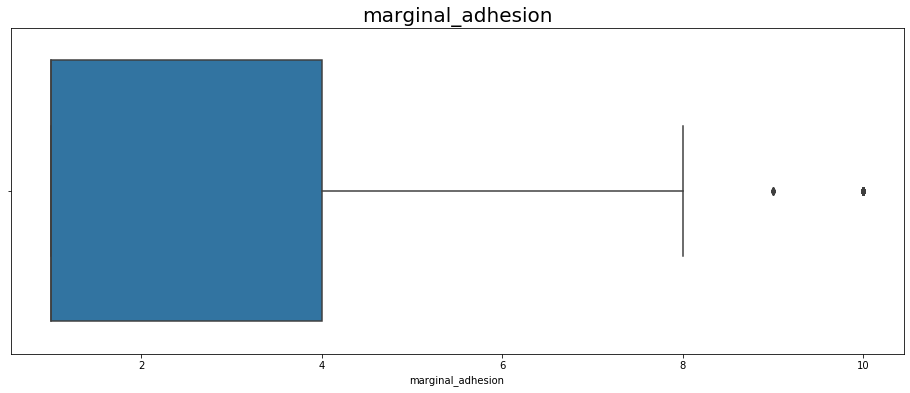

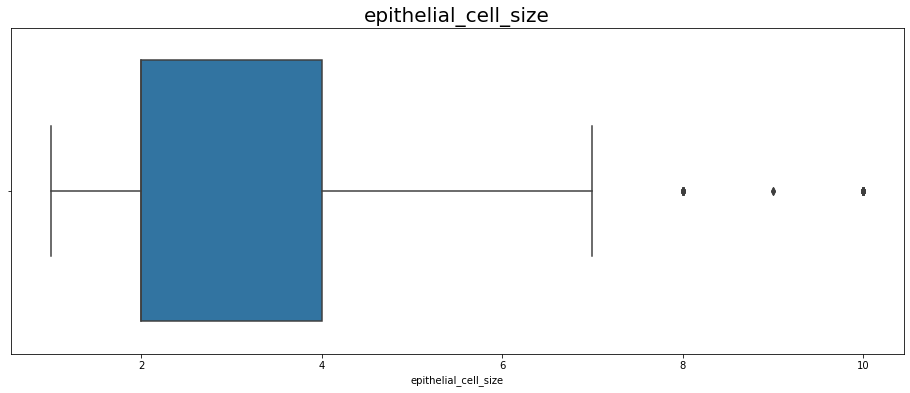

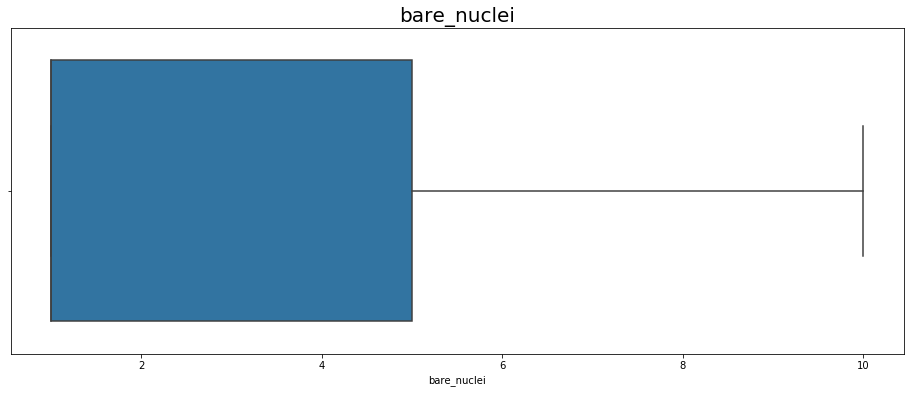

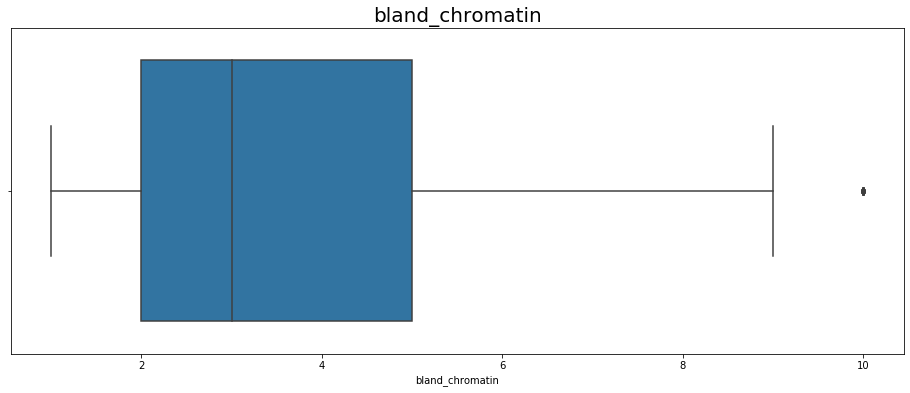

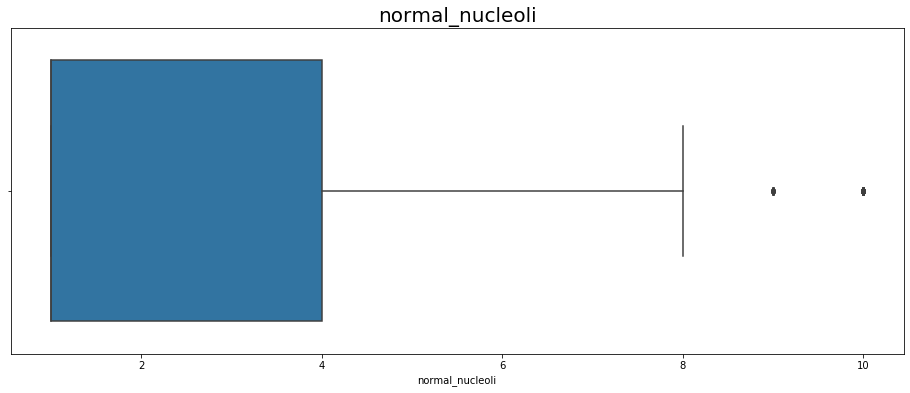

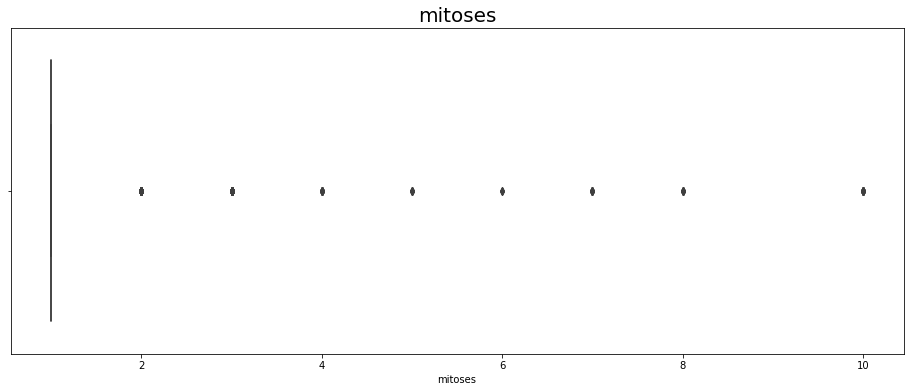

In [10]:
# Boxplots for all the columns
for col in df.columns[1:-1]:
    plt.figure(figsize=(16, 6))
    sns.boxplot(df[col]).axes.set_title(col, fontsize = 20)
    plt.show()

## Test Models:
1. Decision Tree Classifier
    <br /> a) without AdaBoost
    <br /> b) with AdaBoost
2. k-NN Classifier
2. SVM Classifier
3. Neural Networks

In [11]:
# Splitting dataset into training set and test set
X = df.drop(["id","class"], axis = 1)
Y = df["class"]

# 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

### Decision Tree Classifier

In [12]:
### Decision Tree Classifier

# Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

# Predict for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report : ", classification_report(y_test, y_pred)) 


Accuracy: 0.9476190476190476
Report :                precision    recall  f1-score   support

           2       0.95      0.97      0.96       137
           4       0.94      0.90      0.92        73

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



### Decision Tree Classifier with AdaBoost

In [13]:
### Decision Tree Classifier with AdaBoost

# AdaBoost classifier object
clf = AdaBoostClassifier(n_estimators = 30, learning_rate = 1)

# Train AdaBoost Classifier
clf = clf.fit(X_train, y_train)

# Predict for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report : ", classification_report(y_test, y_pred)) 


Accuracy: 0.9714285714285714
Report :                precision    recall  f1-score   support

           2       0.98      0.98      0.98       137
           4       0.96      0.96      0.96        73

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



### k-NN Classifier

In [17]:
### k-NN Classifier

# KNeighbors Classifier object
clf = KNeighborsClassifier(n_neighbors = 3)

# Train KNeighbors Classifier
clf.fit(X_train,y_train)

# Predict for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report : ", classification_report(y_test, y_pred)) 

Accuracy: 0.9714285714285714
Report :                precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



### SVM Classifier

In [15]:
### SVM Classifier

# # Create a SVM Classifier
# clf = svm.SVC(kernel='linear') 

# #Train SVM Classifier
# clf.fit(X_train, y_train)

# # Predict for test dataset
# y_pred = clf.predict(X_test)

# # Model Accuracy and Classification Report
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Report : ", classification_report(y_test, y_pred)) 